In [1]:
# 导入需要的库
import numpy as np
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:


class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # 去除均值
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        
        # 计算协方差矩阵
        cov = np.cov(X.T)
        
        # 计算特征值和特征向量
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        
        # 将特征值按照从大到小的顺序排序
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        
        # 选择前 k 个特征向量
        self.components = eigenvectors[:, :self.n_components]

    def transform(self, X):
        # 去除均值
        X = X - self.mean
        
        # 将原始数据投影到新的维度
        X_transformed = np.dot(X, self.components)
        return X_transformed


In [3]:
import numpy as np

class KNN:
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = []
        for x in X:
            # 计算每个训练数据点与当前数据点的距离
            distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
            
            # 将训练数据点按照距离排序
            sorted_indices = np.argsort(distances)
            
            # 选择最近的 k 个点
            neighbors = sorted_indices[:self.n_neighbors]
            
            # 计算它们的类别并取众数
            labels = [self.y_train[i] for i in neighbors]
            y = np.argmax(np.bincount(labels))
            
            # 将预测结果存储到列表中
            y_pred.append(y)
        
        return np.array(y_pred)


In [4]:
def accuracy(act,pre):
    res=np.zeros_like(act)
    res[act==pre]=1
    return res.mean()

In [5]:
# 加载mnist数据集
X = np.load('data//x.npy',allow_pickle=1)
Y=np.load('data//y.npy',allow_pickle=1)

# 使用PCA对数据集进行降维，保留前50个主成分
pca = PCA(n_components=50)
pca.fit(X)
X_pca = pca.transform(X)

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_pca,Y, test_size=0.2)

# 使用KNN算法进行训练
knn = KNN(10)
knn.fit(X_train, y_train)

# 计算准确率
y_pre = knn.predict(X_test)
print("Accuracy:", accuracy(y_test,y_pre))

Accuracy: 0.9752142857142857


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# -- 混淆矩阵 --
# t为结果向量(n,1)，y为标签向量(n,1)，classes为标签列表(n,)
# 其中默认标签y[i][0]表示classes[y[i][0]]类，比如classes=['猫','狗','鸭子','猪']，若y[i][0]为0则表示为猫
def confusion_matrix_plt(t, y, classes):
    # 构建混淆矩阵
    confusion_matrix = np.zeros((len(classes), len(classes)), dtype='int')
    for i in range(t.shape[0]):
        confusion_matrix[y[i][0]][t[i][0]] += 1
    # print(confusion_matrix)

    # 可视化
    proportion = []
    for i in confusion_matrix:
        for j in i:
            temp = j
            proportion.append(temp)

    proportion = np.array(proportion).reshape(len(classes), len(classes))  # reshape(列的长度，行的长度)

    config = {
        "font.family": 'Times New Roman',  # 设置字体类型
    }
    rcParams.update(config)
    plt.imshow(proportion, interpolation='nearest', cmap=plt.cm.Blues)  # 按照像素显示出矩阵
    # (改变颜色：'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds','YlOrBr', 'YlOrRd',
    # 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn')
    plt.title('confusion_matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    thresh = confusion_matrix.max() / 2.

    iters = np.reshape([[[i, j] for j in range(len(classes))] for i in range(len(classes))], (confusion_matrix.size, 2))
    for i, j in iters:
        if (i == j):
            plt.text(j, i - 0.12, format(confusion_matrix[i, j]), va='center', ha='center', fontsize=12, color='white',
                     weight=5)  # 显示对应的数字

        else:
            plt.text(j, i - 0.12, format(confusion_matrix[i, j]), va='center', ha='center', fontsize=12)  # 显示对应的数字

    plt.ylabel('True label', fontsize=16)
    plt.xlabel('Predict label', fontsize=16)
    plt.tight_layout()
    plt.show()

In [12]:
class1=y_test.reshape(y_test.shape[0],-1)
class2=y_pre.reshape(y_pre.shape[0],-1)
class1.shape,class2.shape

((14000, 1), (14000, 1))

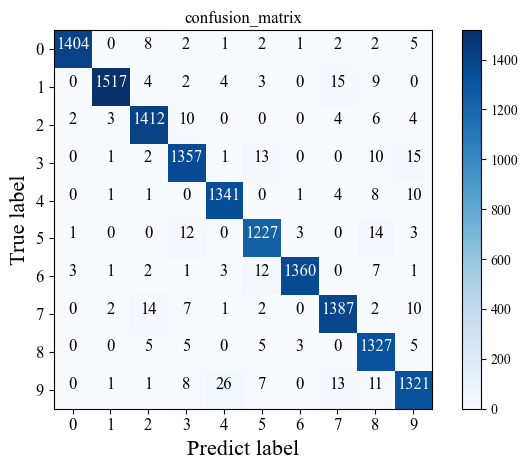

In [13]:
confusion_matrix_plt(class1,class2,range(10))